# Water Quality and Potability

This model is a binary classifier built on a neural network architecture, aimed to predict water potability based on various water quality parameters.

The dataset can be found [here](https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv)


This specific model uses **Dropout** as the primary regularization technique and **RMSprop** as the optimizer

#### Importing the necessary libraries and load the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the data
data = pd.read_csv(r'C:\Users\user\water_potability\water_potability.csv')
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### Data Preprocessing
- The dataset has missing values indicated by (NaN). Median imputation was used
- The features also need to be scaled down. Normalizing using MinMax scaler was applied
- The dataset is split into a training set carrying 70%, a validation set (15%), and a test set (15%)

In [3]:
# Handle missing values with median imputation
data = data.fillna(data.median())

# split features and target
X = data.drop('Potability', axis=1)
y = data['Potability']

# scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# split into train-70, validation-15, test-15
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### Model Architecture



This is a 4-layer feedforward neural network with **Dropout** for regularization

- **ReLU** activation is used in each hidden layer
- **Sigmoid** activation is used in the output layer 

It is using **RMSprop** with a **learning rate of 0.0005**

- For loss & metrics; **binary crossentropy** as the loss function, and **accuracy** as the evaluation metric


In [6]:
model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(9,)),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dropout(0.1),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    
optimizer = keras.optimizers.RMSprop(learning_rate=0.0005)
model.compile(optimizer=optimizer,
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    

#### Training

In [7]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=31,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5894 - loss: 0.6797 - val_accuracy: 0.6314 - val_loss: 0.6607
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6180 - loss: 0.6675 - val_accuracy: 0.6314 - val_loss: 0.6658
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6053 - loss: 0.6753 - val_accuracy: 0.6314 - val_loss: 0.6623
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5980 - loss: 0.6742 - val_accuracy: 0.6314 - val_loss: 0.6607
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6068 - loss: 0.6714 - val_accuracy: 0.6314 - val_loss: 0.6634
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6143 - loss: 0.6665 - val_accuracy: 0.6314 - val_loss: 0.6600
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5997 - loss: 0.6722 - val_accuracy: 0.6314 - val_loss: 0.6617
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6106 - loss: 0.6691 - val_accuracy: 0.6314 - 

#### Predictions & Performance

In [12]:
# Predictions
y_pred = (model.predict(X_test) > 0.4).astype(int)

# Performance Report
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       307
           1       0.53      0.51      0.52       185

    accuracy                           0.65       492
   macro avg       0.62      0.62      0.62       492
weighted avg       0.64      0.65      0.64       492

[[224  83]
 [ 91  94]]


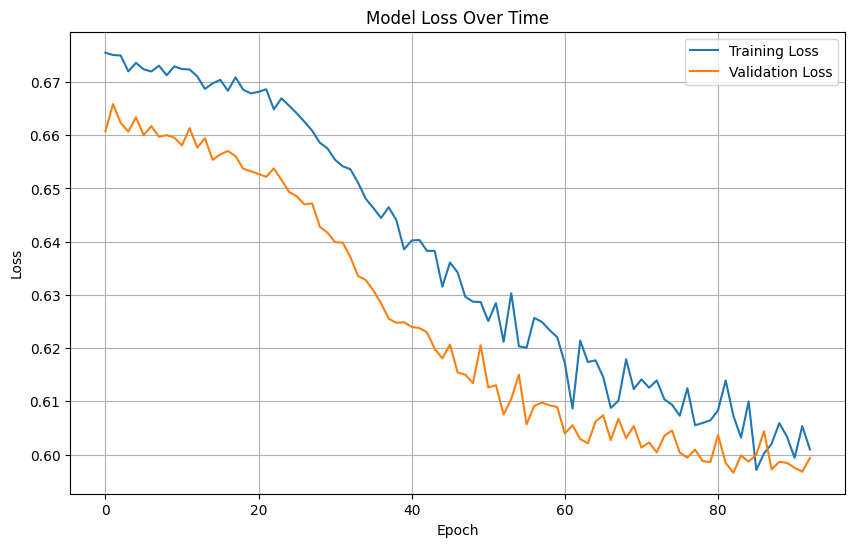

In [13]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
